1. Что такое OR, CTOR и CTR? как они высчитываются?
2. Что такое сегментация аудитории? По каким параметрам можно сегментировать аудитрию?
3. Какие метрики можно использовать для оценки успешности рекламной кампании в email и мессенджерах?

практические 

1. Указать количество уникальных пользователей в базе рассылки; 
уникальных пользователей, которые открыли хотя бы 1 письмо; 
которые перешли хотя бы из 1 письма"
2. Указать средний OR, CTR
3. Указать, сколько в среднем Open приходится на одного пользователя.
4. Добавить в Data столбец "Count_of_contact", в котором будет указано сумма Open по этому пользователю.
** Доп. вопросы:

1. Посчитай количество врачей получивших 1-2 контакта, 3-10 контактов, 11 и более контактов. Визуализируй результат. О чем он может нам говорить?
2. Как выглядел бы код на пайтон для получения ответа на вопрос 3
3. Как выглядел бы sql запрос для получения ответа на вопрос 3


Что такое OR, CTOR и CTR? как они высчитываются?

### OR (Open Rate) — коэффициент открытий

Показывает процент получателей, которые открыли письмо от общего числа доставленных писем.

### CTOR (Click-to-Open Rate) — коэффициент кликов к открытиям

Отражает процент получателей, которые кликнули по ссылке в письме среди тех, кто его открыл.

### CTR (Click-Through Rate) — коэффициент кликов

Показывает процент пользователей, которые кликнули по ссылке в письме, от общего числа доставленных писем.


### Что такое сегментация аудитории? По каким параметрам можно сегментировать аудитрию?

Сегментация аудитории — это процесс разделения целевой аудитории на группы (сегменты) по определённым критериям, чтобы сделать маркетинговые коммуникации более персонализированными и эффективными.

Аудиторию можно сегментировать по демографическим, географическим, психографическим и поведенческим признакам.

### Какие метрики можно использовать для оценки успешности рекламной кампании в email и мессенджерах?

Все выше перечисленные, а так же

Метрики для мессенджеров

Доставляемость сообщений
Сколько сообщений было доставлено пользователям.

Открываемость сообщений
Аналог OR в email: сколько людей открыло сообщение.

Ответы (Response Rate)
Сколько людей ответило на сообщение.

Вовлечённость (Engagement Rate)
Как активно пользователи взаимодействуют с ботом или контентом.

Отписки (Unsubscribe Rate)

Конверсии (Conversion Rate)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_excel('/Users/endybuligori/Downloads/Тестовое Аналитик ОСМ.xlsx', sheet_name= 'Data' ,engine="openpyxl")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   User_ID    4999 non-null   object        
 1   Sent_date  4999 non-null   datetime64[ns]
 2    Sent      4999 non-null   int64         
 3   Deliver    4999 non-null   int64         
 4   Open       4999 non-null   int64         
 5   Click      4999 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 234.5+ KB


In [5]:
data.head(10)

,User_ID,Sent_date,Sent,Deliver,Open,Click
0,6c6c49z9,2024-01-10,1,1,0,0
1,1460611e,2024-01-10,1,1,0,0
2,ze1u8045,2024-01-11,1,1,0,0
3,410e3668,2024-01-11,1,1,0,0
4,z4d813du,2024-01-11,1,1,0,0
5,u76zd5cz,2024-01-11,1,1,0,0
6,7eeu5uk4,2024-01-13,1,1,0,0
7,c5z5dce0,2024-01-13,1,1,0,0
8,11e39ed8,2024-01-17,1,1,0,0
9,kucz9507,2024-01-18,1,1,0,0


In [6]:
data.duplicated().sum()

1026

In [7]:
data[data.duplicated()]

,User_ID,Sent_date,Sent,Deliver,Open,Click
13,kucz9507,2024-01-18,1,1,0,0
40,CRMid003,2024-01-23,1,1,0,0
45,CRMid007,2024-01-23,1,1,0,0
48,CRMid003,2024-01-23,1,1,0,0
49,CRMid000,2024-01-23,1,1,0,0
...,...,...,...,...,...,...
4984,CRMid000,2024-03-27,1,1,0,0
4989,CRMid005,2024-03-27,1,1,0,0
4992,CRMid004,2024-03-27,1,1,0,0
4993,CRMid004,2024-03-27,1,1,0,0


In [8]:
data.columns = data.columns.str.lower()

In [9]:
data = data.rename(columns = {' sent':'sent'})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    4999 non-null   object        
 1   sent_date  4999 non-null   datetime64[ns]
 2   sent       4999 non-null   int64         
 3   deliver    4999 non-null   int64         
 4   open       4999 non-null   int64         
 5   click      4999 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 234.5+ KB


пропусков нет 

# Указать количество уникальных пользователей в базе рассылки; уникальных пользователей, которые открыли хотя бы 1 письмо; которые перешли хотя бы из 1 письма"

In [11]:
print('Количество уникальных пользователей:',data['user_id'].nunique())

Количество уникальных пользователей: 2883


In [12]:
uniq_open = data.loc[data['open'] == 1, 'user_id'].nunique()

In [13]:
print('уникальные пользователи которые открыли хотябы 1 письмо:',uniq_open)

уникальные пользователи которые открыли хотябы 1 письмо: 388


In [14]:
uniq_click = data.loc[data['click'] == 1, 'user_id'].nunique()

In [15]:
print('уникальные пользователи которые перешли хотя бы из 1 письма:',uniq_click)

уникальные пользователи которые перешли хотя бы из 1 письма: 64


In [16]:
open_data = data.loc[data['open'] == 1]

In [17]:
open_data

,user_id,sent_date,sent,deliver,open,click
16,1e37uz47,2024-01-23,1,1,1,0
17,83c8510u,2024-01-23,1,1,1,0
21,65d88z5e,2024-01-23,1,1,1,0
42,CRMid000,2024-01-23,1,1,1,0
47,5e35e879,2024-01-23,1,1,1,0
...,...,...,...,...,...,...
4949,uu3098e5,2024-03-27,1,1,1,0
4952,CRMid003,2024-03-27,1,1,1,1
4970,CRMid004,2024-03-27,1,1,1,0
4973,0149uc6z,2024-03-27,1,1,1,0


In [18]:
open_data.loc[open_data['click'] == 1, 'user_id'].nunique()

59

In [19]:
data.loc[(data['open'] == 0) & (data['click'] == 1),'user_id'].unique()

array(['CRMid007', 'dz4uc7c7', '7695e3uu', '8k308kud', '4c943z9e',
       'CRMid000', 'CRMid005'], dtype=object)

есть несколько пользователей перешедших по ссылке не открывая письма 


# 2. Указать средний OR, CTR

OR (Open Rate) — коэффициент открытий

Показывает процент получателей, которые открыли письмо от общего числа доставленных писем.

посчитаем OR


In [20]:
OR = ((data['open'].sum() / data['deliver'].sum()) * 100).round(2)

In [21]:
print('коэффициент открытий составляет',OR,'%')

коэффициент открытий составляет 12.08 %


CTR (Click-Through Rate) — коэффициент кликов

Показывает процент пользователей, которые кликнули по ссылке в письме, от общего числа доставленных писем.


Расчитаем CTR

In [22]:
CTR = ((data['click'].sum() / data['deliver'].sum()) * 100).round(2)

In [23]:
print('коэффициент кликов составляет',CTR,'%')

коэффициент кликов составляет 1.67 %


# 3. Указать, сколько в среднем Open приходится на одного пользователя.

In [24]:
open_to_person = (data['open'].sum()/data['user_id'].nunique()).round(2)

In [25]:
print('в среднем на одного пользователя приходится',open_to_person,'открытий')

в среднем на одного пользователя приходится 0.2 открытий


Можем посчитать по другому 

In [26]:
sum_open = data.groupby('user_id')['open'].sum()

In [27]:
sum_open.mean()

0.1987513007284079

# 4. Добавить в Data столбец "Count_of_contact", в котором будет указано сумма Open по этому пользователю.

In [28]:
data['count_of_contact'] = data.groupby('user_id')['open'].transform('sum')

In [29]:
data

,user_id,sent_date,sent,deliver,open,click,count_of_contact
0,6c6c49z9,2024-01-10,1,1,0,0,0
1,1460611e,2024-01-10,1,1,0,0,0
2,ze1u8045,2024-01-11,1,1,0,0,0
3,410e3668,2024-01-11,1,1,0,0,0
4,z4d813du,2024-01-11,1,1,0,0,1
...,...,...,...,...,...,...,...
4994,5e00ce3c,2024-03-27,1,1,0,0,0
4995,CRMid005,2024-03-27,1,1,0,0,11
4996,d6ze4339,2024-03-29,1,1,0,0,0
4997,c9e4e717,2024-03-30,1,1,0,0,0


# 5. Посчитай количество врачей получивших 1-2 контакта, 3-10 контактов, 11 и более контактов. Визуализируй результат. О чем он может нам говорить?

In [30]:
new_data = data.loc[data['count_of_contact'] > 0]


In [31]:
new_data

,user_id,sent_date,sent,deliver,open,click,count_of_contact
4,z4d813du,2024-01-11,1,1,0,0,1
16,1e37uz47,2024-01-23,1,1,1,0,1
17,83c8510u,2024-01-23,1,1,1,0,1
21,65d88z5e,2024-01-23,1,1,1,0,2
30,4d57777u,2024-01-23,1,1,0,0,1
...,...,...,...,...,...,...,...
4984,CRMid000,2024-03-27,1,1,0,0,41
4989,CRMid005,2024-03-27,1,1,0,0,11
4992,CRMid004,2024-03-27,1,1,0,0,27
4993,CRMid004,2024-03-27,1,1,0,0,27


In [33]:
bins = [0, 2, 10, float('inf')]  
labels = ['1-2', '3-10', '>11']

new_data['contact_range'] = pd.cut(new_data['count_of_contact'], bins=bins, labels=labels)

/var/folders/qj/78y5g6q55fgg3z8sg3lhzsxh0000gn/T/ipykernel_66844/1326055898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['contact_range'] = pd.cut(new_data['count_of_contact'], bins=bins, labels=labels)


In [35]:
unique_users = new_data.groupby('contact_range').agg({'user_id':'nunique'})

In [36]:
unique_users

,user_id
contact_range,
1-2,375
3-10,8
>11,5


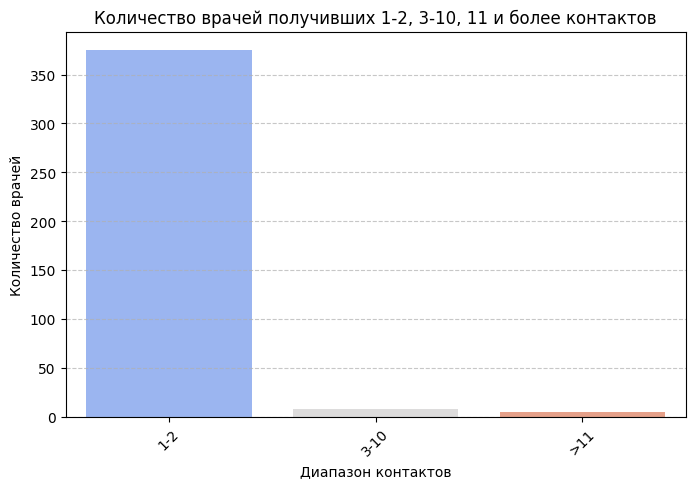

In [39]:

plt.figure(figsize=(8, 5))
sns.barplot(x=unique_users.index, y=unique_users['user_id'], palette='coolwarm')


plt.title('Количество врачей получивших 1-2, 3-10, 11 и более контактов')
plt.xlabel('Диапазон контактов')
plt.ylabel('Количество врачей')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


Судя по графику наибольшее количество врачей получило от 1 до 2 откликов 

! так же можно было бы посчитать конверсию получения контактов, а так же понять связанно ли количество отправленных писем с количеством полученных контактов 

# 6. Как выглядел бы sql запрос для получения ответа на вопрос 3


In [40]:
data

,user_id,sent_date,sent,deliver,open,click,count_of_contact
0,6c6c49z9,2024-01-10,1,1,0,0,0
1,1460611e,2024-01-10,1,1,0,0,0
2,ze1u8045,2024-01-11,1,1,0,0,0
3,410e3668,2024-01-11,1,1,0,0,0
4,z4d813du,2024-01-11,1,1,0,0,1
...,...,...,...,...,...,...,...
4994,5e00ce3c,2024-03-27,1,1,0,0,0
4995,CRMid005,2024-03-27,1,1,0,0,11
4996,d6ze4339,2024-03-29,1,1,0,0,0
4997,c9e4e717,2024-03-30,1,1,0,0,0


SELECT AVG(CLICK)
FROM DATA
GROUP BY USER_ID 